In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
data = pd.read_csv("Iris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [8]:
data.shape

(150, 6)

In [10]:
#Display the name of columns

In [12]:
print(*data.columns, sep = "\n")

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [15]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
data.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [17]:
data = data.drop(['Id'], axis = 1)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

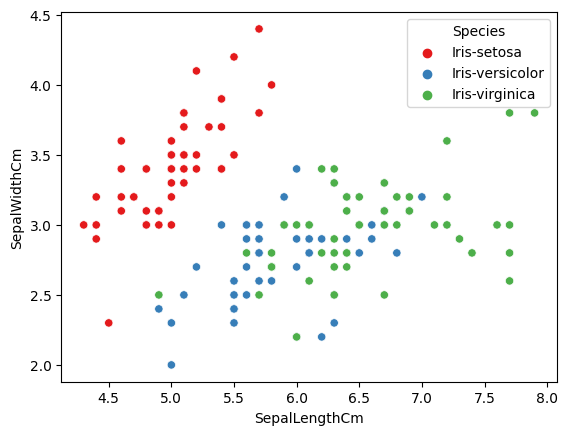

In [18]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data, palette = 'Set1')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

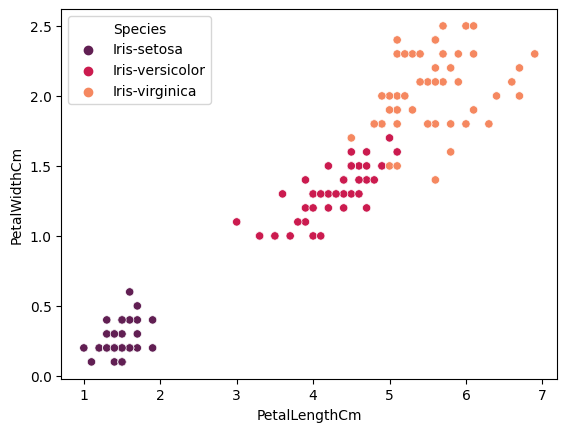

In [19]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=data, palette = 'rocket' )

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

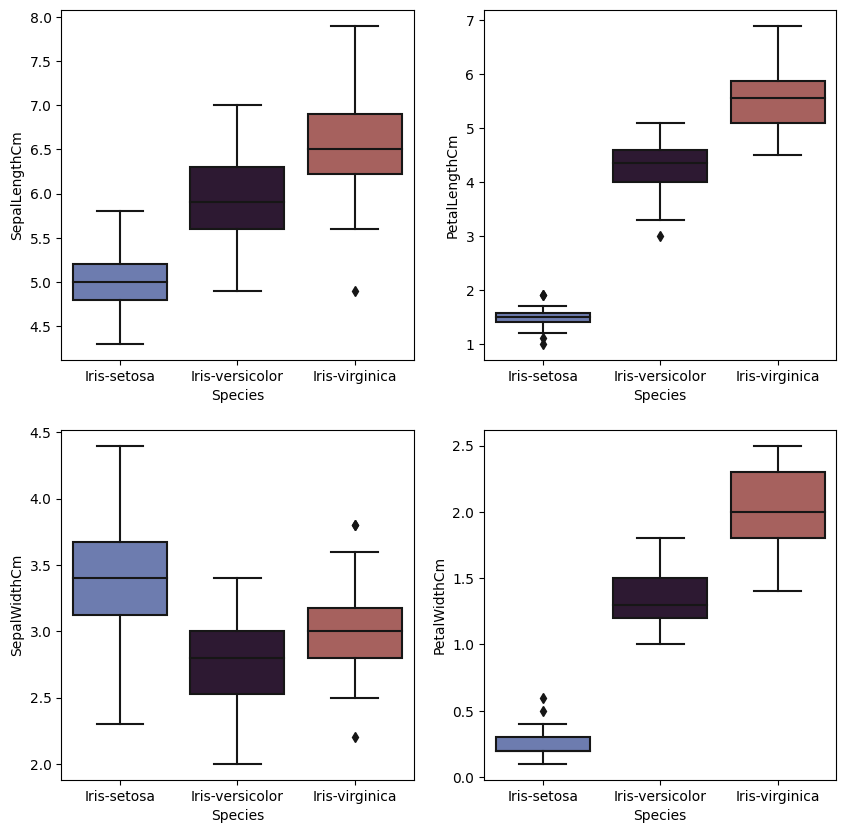

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y = 'SepalLengthCm', x = 'Species', data = data, palette = 'twilight')

plt.subplot(2,2,2)
# Checking for the outliers
sns.boxplot(y = 'PetalLengthCm', x = 'Species', data = data, palette = 'twilight')

plt.subplot(2,2,3)
sns.boxplot(y = 'SepalWidthCm', x = 'Species', data = data, palette = 'twilight')


plt.subplot(2,2,4)
sns.boxplot(y = 'PetalWidthCm', x = 'Species', data = data, palette = 'twilight')

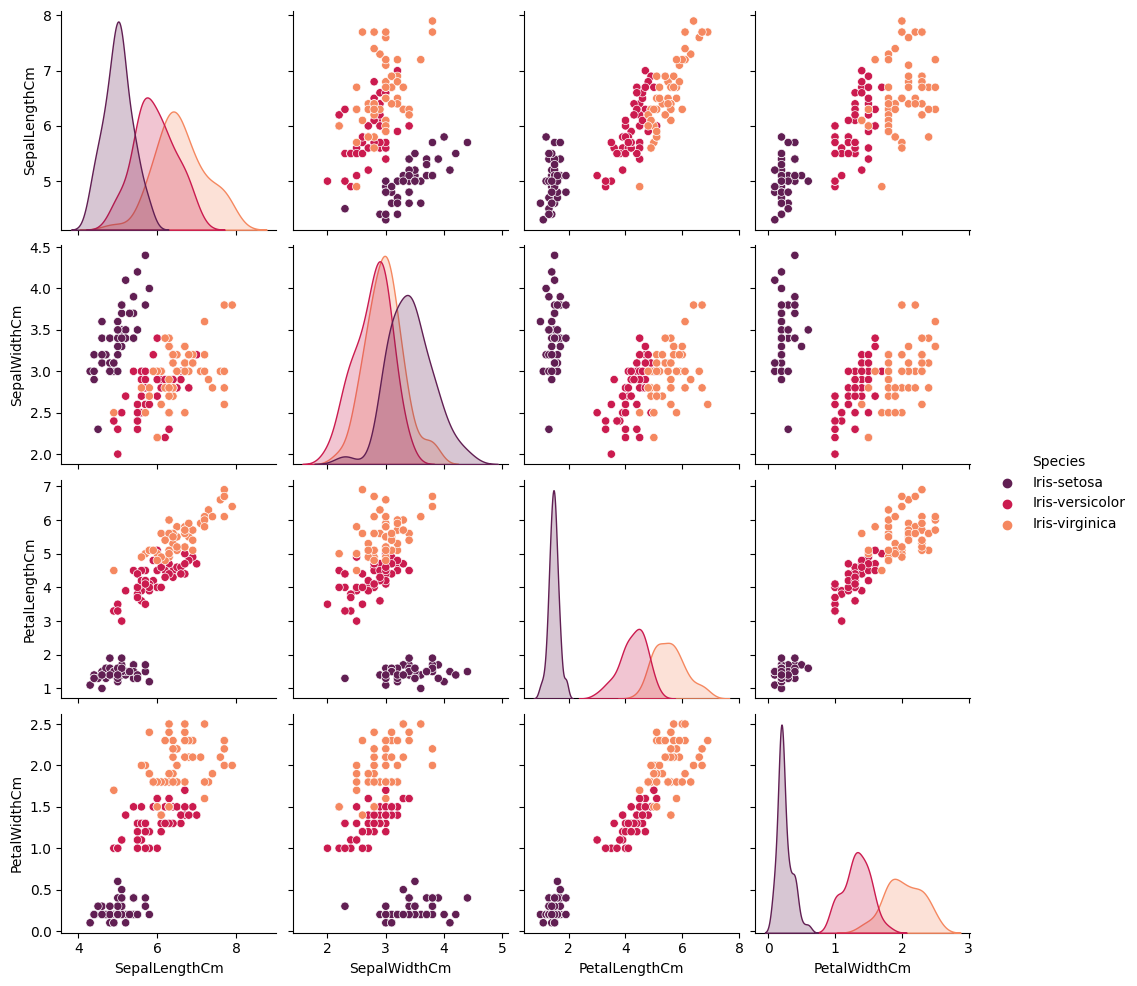

In [21]:
sns.pairplot(data, hue = 'Species', palette = 'rocket')

In [22]:
data = data.sample(frac = 1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,4.7,3.2,1.3,0.2,Iris-setosa
115,6.4,3.2,5.3,2.3,Iris-virginica
65,6.7,3.1,4.4,1.4,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
0,5.1,3.5,1.4,0.2,Iris-setosa
...,...,...,...,...,...
72,6.3,2.5,4.9,1.5,Iris-versicolor
108,6.7,2.5,5.8,1.8,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
89,5.5,2.5,4.0,1.3,Iris-versicolor


In [23]:
label_encoder = preprocessing.LabelEncoder()

In [25]:
data['Species'] = label_encoder.fit_transform(data['Species'])

In [26]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,4.7,3.2,1.3,0.2,0
115,6.4,3.2,5.3,2.3,2
65,6.7,3.1,4.4,1.4,1
87,6.3,2.3,4.4,1.3,1
0,5.1,3.5,1.4,0.2,0
...,...,...,...,...,...
72,6.3,2.5,4.9,1.5,1
108,6.7,2.5,5.8,1.8,2
103,6.3,2.9,5.6,1.8,2
89,5.5,2.5,4.0,1.3,1


In [27]:
X = data.drop(['Species'], axis = 1)

In [28]:
Y = data.Species

In [30]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
2              4.7           3.2            1.3           0.2
115            6.4           3.2            5.3           2.3
65             6.7           3.1            4.4           1.4
87             6.3           2.3            4.4           1.3
0              5.1           3.5            1.4           0.2
..             ...           ...            ...           ...
72             6.3           2.5            4.9           1.5
108            6.7           2.5            5.8           1.8
103            6.3           2.9            5.6           1.8
89             5.5           2.5            4.0           1.3
25             5.0           3.0            1.6           0.2

[150 rows x 4 columns]


In [31]:
print(Y)

2      0
115    2
65     1
87     1
0      0
      ..
72     1
108    2
103    2
89     1
25     0
Name: Species, Length: 150, dtype: int64


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, test_size = 0.25, random_state = 10)

In [33]:
X_train.shape

(112, 4)

In [34]:
X_test.shape

(38, 4)

In [41]:
DTC = DecisionTreeClassifier()

In [42]:
DTC.fit(X_train, Y_train)

DecisionTreeClassifier()

In [43]:
Y_pred = DTC.predict(X_test)

In [45]:
print(accuracy_score(Y_test, Y_pred)*100)

94.73684210526315


In [47]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.83      0.91        12
           2       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



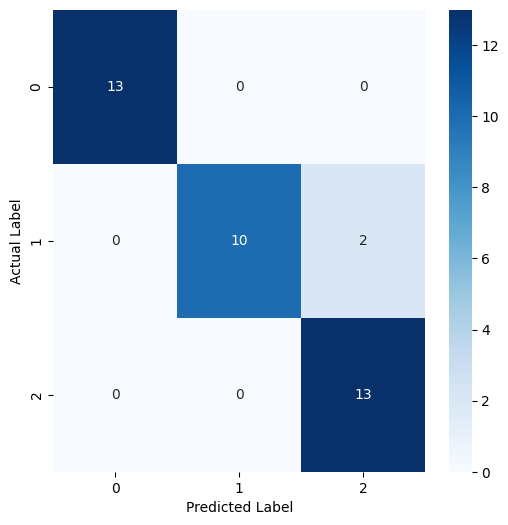

In [52]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [53]:
sample = np.array([[7.3,2.8,6.3, 1.8]]) #Prediction should be Iris-Verginica

In [56]:
print("The prediction is : ", int(DTC.predict(sample)))

The prediction is :  2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [57]:
#Visualizing the decision tree

In [62]:
features =['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [63]:
species = ['setosa', 'versicolor', 'virginica']

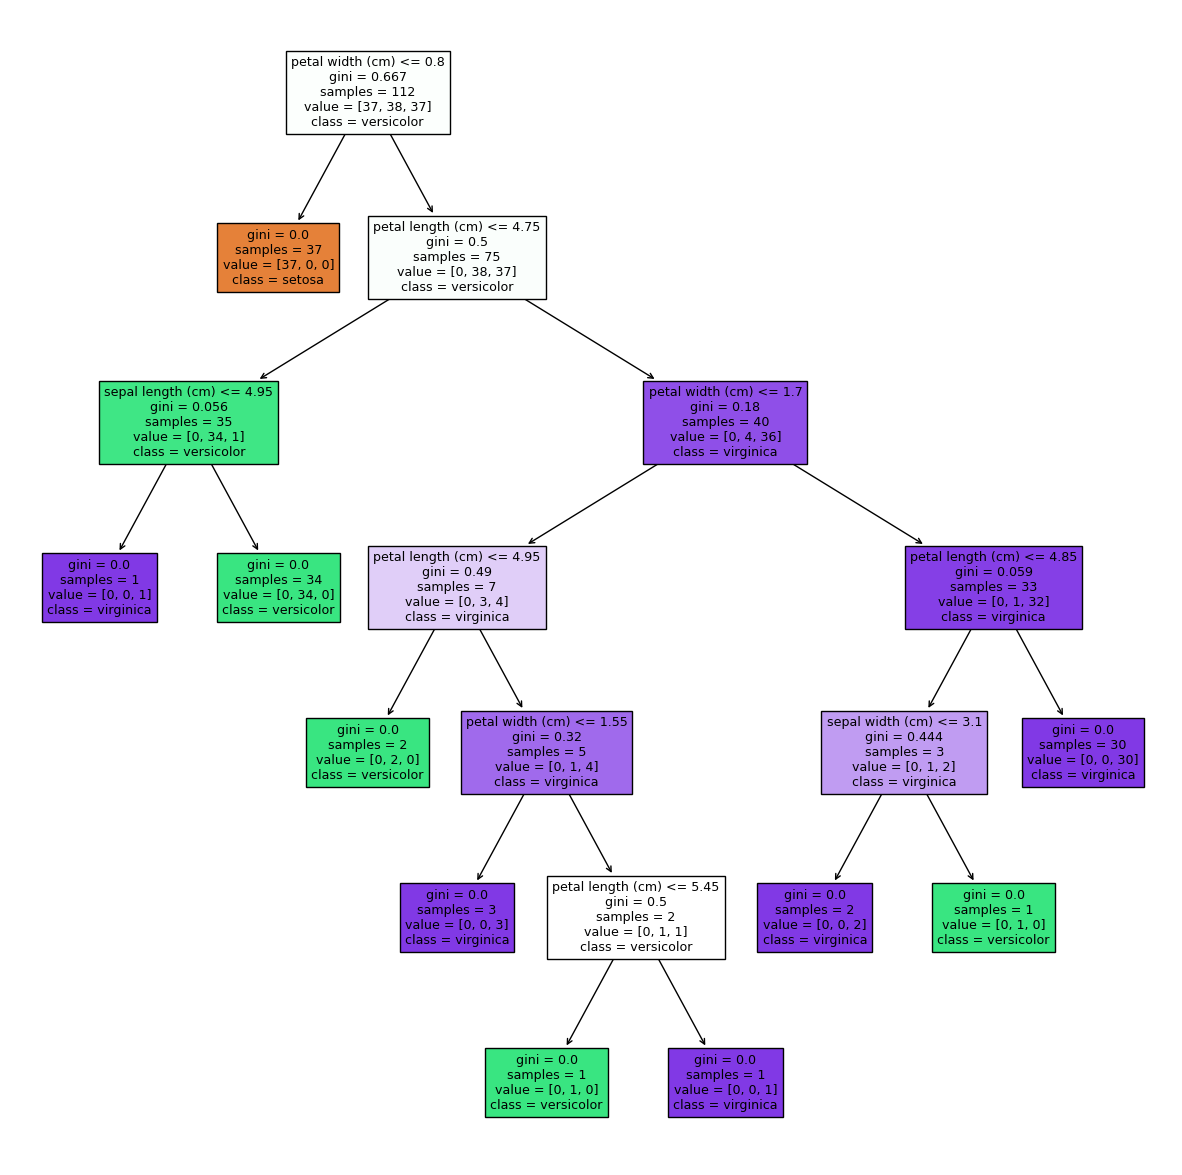

In [66]:
fig = plt.figure(figsize = (15,15))
tree.plot_tree(DTC, feature_names = features, class_names = species, filled = True);